# POS&NER analyzing

**โจทย์**

* การหากิจกรรมและสิ่งที่เกี่ยวข้องกับข่าวแต่ละประเภท
*   องค์กรหรือหน่วยงานที่เกี่ยวข้องกับข่าวของแต่ประเภท



 # Dataset 
  

Scrape จาก www.snook.com ระหว่างวันที่ 1 ก.พ. 2023 ถึง 23 ก.พ. 2023 ซึ่งประกอบด้วย


*  ข่าวกีฬา (Sport)
*  ข่าวไอที (Hitech)
*  ข่าวเศรษฐกิจ(Money)
*  ข่าวหนัง(Movie)
*  ข่าวการศึกษา( Campus)
*  ข่าวเกมส์ (Game)
*  ข่าวท่องเที่ยว(Travel)

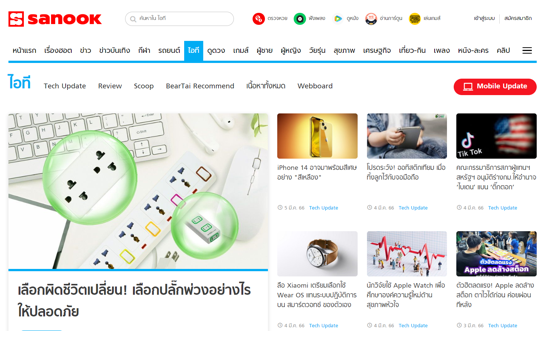

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install pythainlp
!pip install pythainlp[full]
!pip install sentencepiece
!pip install attacut
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 85.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to 

In [2]:
import pandas as pd
import string
import re

Pickle เป็นการเก็บไฟล์ในรูปแบบหนึ่งเหมือนกับไฟล์ csv แต่คนไม่สามารถเปิดอ่านได้เหมือนกับไฟล์ csv ต้องใช้ภาษา python ในการอ่าน มีข้อดีคือใช้พื้นที่ในการเก็บใน harddisk น้อยกว่า และใช้เวลาในการอ่านหรือ save เร็วกว่าไฟล์ csv

In [3]:
df_sel=pd.read_pickle('/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/Snook_scraping.pkl')

In [5]:
df_sel.columns

Index(['URL', 'Text', 'Time', 'new_section', 'Text_real'], dtype='object')

In [6]:
df_sel.head()

,URL,Text,Time,new_section,Text_real
0,https://www.sanook.com/campus/1413467/,"['สนับสนุนเนื้อหา', 'ไม่ว่าจะปีเก่าหรือปีใหม่ ...",05 ก.พ. 66 (18:00 น.),Campus,[ไม่ว่าจะปีเก่าหรือปีใหม่ สิ่งที่ผู้คนให้ความส...
1,https://www.sanook.com/campus/1403515/,"['Natchaphon B.', 'มนุษย์ติดโซเชียล พร้อมพาส่อ...",06 ก.พ. 66 (14:51 น.),Campus,[มนุษย์ติดโซเชียล พร้อมพาส่องหนุ่มหล่อสาวสวยมา...
2,https://www.sanook.com/campus/1413463/,"['สนับสนุนเนื้อหา', 'หากพูดถึงภัยไซเบอร์จาก “ม...",05 ก.พ. 66 (12:00 น.),Campus,[หากพูดถึงภัยไซเบอร์จาก “มิจฉาชีพออนไลน์” ในปั...
3,https://www.sanook.com/campus/1414103/,"['Natchaphon B.', 'มนุษย์ติดโซเชียล พร้อมพาส่อ...",06 ก.พ. 66 (11:49 น.),Campus,[มนุษย์ติดโซเชียล พร้อมพาส่องหนุ่มหล่อสาวสวยมา...
4,https://www.sanook.com/game/1102257/,"['สนับสนุนเนื้อหา', 'กลับมาอีกครั้งกับผลงานคอส...",06 ก.พ. 66 (17:10 น.),Game,[กลับมาอีกครั้งกับผลงานคอสเพลย์จาก Azami สาวอั...


**Parameter**


*   URL(str) : linkของข่าว
*   Text(list): ข้อความข่าวที่ Scrape มาจาก tag p (paragraph)
*  Time(str) : วันและเวลาของข่าว
*  new_section(str) : ประเภทของข่าว
* Text_real(list) : ข้อความที่ Scrape มาจาก tag p (paragraph)และเลือกมาเฉพาะเนื้อหาของข่าว


# Explore

In [7]:
df_sel['new_section'].value_counts()

Sport     307
Hitech    176
Money     142
Movie     110
Campus    109
Game       98
Travel     85
Name: new_section, dtype: int64

<AxesSubplot:>

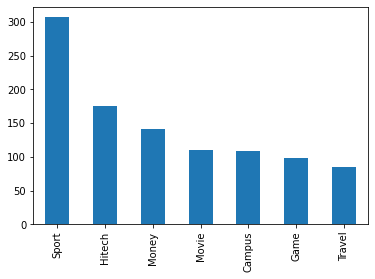

In [8]:
df_sel['new_section'].value_counts().plot(kind='bar')

In [9]:
df_sel['Text_real'][0]

['ไม่ว่าจะปีเก่าหรือปีใหม่ สิ่งที่ผู้คนให้ความสนใจก็คงจะหนีไม่พ้นเรื่องของปากท้องเป็นสำคัญ คนทำงานยังต้องตั้งหน้าตั้งตาพัฒนาตัวเองเพื่อให้ได้ไปต่อในสายงานที่ทำอยู่ เพราะนอกจากเทคโนโลยีจะเข้ามาเป็นตัวแปรสำคัญแล้ว คนด้วยกันเองก็ยังคงเป็นคู่แข่ง เพราะถ้าหากองค์กรจำเป็นต้องลดขนาดเพื่อให้สอดคล้องกับสภาวะเศรษฐกิจ คนทำงานส่วนหนึ่งต้องออกจากสายงานไป และมีบางส่วนที่ได้อยู่ต่อ คำถามคือ คนทำงานแบบไหนล่ะที่องค์กรจะยังเก็บไว้ หรือคนทำงานแบบไหนที่องค์กรต้องการ คนที่มีศักยภาพมากพอที่จะจ้างงาน',
 'เรื่องปกติที่องค์กรต่าง ๆ จะเฟ้นหาบุคลากรที่มีคุณภาพเข้ามาเป็นส่วนหนึ่งในการพัฒนาทีม และเพื่อการเติบโตขององค์กร ในจำนวนของผู้สมัครงานนับร้อยนับพัน องค์กรจะต้องคัดเอาบุคลากรที่มีศักยภาพที่เป็นประโยชน์ต่อทีมมากที่สุดเข้ามา ซึ่งองค์กรมักจะมองหาผู้ที่มีทักษะการทำงานทั้งในด้าน Soft Skills และ Hard Skills หรือแม้แต่ Meta Skills ซึ่งเป็นทักษะการเรียนรู้ตลอดชีวิต เป็นความสามารถในการพร้อมรับความเปลี่ยนแปลงที่จะเกิดขึ้น เพื่อนำมาพัฒนาการทำงาน เพราะเราต้องรับมือกับความเปลี่ยนแปลงที่ถาโถมเข้ามาอย่างรวดเร็ว จึงต้องมีทักษ

# Preprocessing text

**การทำความสะอาดข้อความหรือ preprocessing**

*   แปลงตัวอักษรภาษาอังกฤษจากตัวพิมพ์ใหญ่เป็นตัวพิมพ์เล็ก
*   ลบ \n,xa0 และ u200b ออกจากข้อความ
*   ลบ punctuation ออกจากข้อความ

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def preprocess_cleansing(text):
      ''' Converting  text to lower case
      and  removing all punctuation'''
      # แปลงตัวอักษรตัวใหญ่ให้เป็นตัวเล็กทั้งหมด
      text=text.lower()
      # ลบ punctuation ทั้งหมด
      text = re.sub('\n', ' ', text)
      text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
      text = re.sub('xa0|u200b', ' ', text)
      return text

In [13]:
def cleansing_list_of_text(list_of_text):
    ''' preprocessing text in list'''
    result=[]
    for text in list_of_text:
        # preprocess_cleansing
        clean_text=preprocess_cleansing(text)
        result.append(clean_text)
    # เลือกเฉพาะ text ที่มีจำนวนพยางค์มากกว่า 0
    result=[w for w in result if len(w)>1]
    return result

In [14]:
# ทำความสะอาดข้อความใน list
df_sel['Text_real']=df_sel['Text_real'].apply(lambda x:cleansing_list_of_text(x))

In [16]:
df_sel['Text_real'][0]

['ไม่ว่าจะปีเก่าหรือปีใหม่ สิ่งที่ผู้คนให้ความสนใจก็คงจะหนีไม่พ้นเรื่องของปากท้องเป็นสำคัญ คนทำงานยังต้องตั้งหน้าตั้งตาพัฒนาตัวเองเพื่อให้ได้ไปต่อในสายงานที่ทำอยู่ เพราะนอกจากเทคโนโลยีจะเข้ามาเป็นตัวแปรสำคัญแล้ว คนด้วยกันเองก็ยังคงเป็นคู่แข่ง เพราะถ้าหากองค์กรจำเป็นต้องลดขนาดเพื่อให้สอดคล้องกับสภาวะเศรษฐกิจ คนทำงานส่วนหนึ่งต้องออกจากสายงานไป และมีบางส่วนที่ได้อยู่ต่อ คำถามคือ คนทำงานแบบไหนล่ะที่องค์กรจะยังเก็บไว้ หรือคนทำงานแบบไหนที่องค์กรต้องการ คนที่มีศักยภาพมากพอที่จะจ้างงาน',
 'เรื่องปกติที่องค์กรต่าง ๆ จะเฟ้นหาบุคลากรที่มีคุณภาพเข้ามาเป็นส่วนหนึ่งในการพัฒนาทีม และเพื่อการเติบโตขององค์กร ในจำนวนของผู้สมัครงานนับร้อยนับพัน องค์กรจะต้องคัดเอาบุคลากรที่มีศักยภาพที่เป็นประโยชน์ต่อทีมมากที่สุดเข้ามา ซึ่งองค์กรมักจะมองหาผู้ที่มีทักษะการทำงานทั้งในด้าน soft skills และ hard skills หรือแม้แต่ meta skills ซึ่งเป็นทักษะการเรียนรู้ตลอดชีวิต เป็นความสามารถในการพร้อมรับความเปลี่ยนแปลงที่จะเกิดขึ้น เพื่อนำมาพัฒนาการทำงาน เพราะเราต้องรับมือกับความเปลี่ยนแปลงที่ถาโถมเข้ามาอย่างรวดเร็ว จึงต้องมีทักษ

In [17]:
# เชื่อม list ของข้อความด้วยคำสั่ง join()
df_sel['Text_combine']=df_sel['Text_real'].apply(lambda x:' '.join(x))

In [18]:
df_sel['Text_combine'][0]

'ไม่ว่าจะปีเก่าหรือปีใหม่ สิ่งที่ผู้คนให้ความสนใจก็คงจะหนีไม่พ้นเรื่องของปากท้องเป็นสำคัญ คนทำงานยังต้องตั้งหน้าตั้งตาพัฒนาตัวเองเพื่อให้ได้ไปต่อในสายงานที่ทำอยู่ เพราะนอกจากเทคโนโลยีจะเข้ามาเป็นตัวแปรสำคัญแล้ว คนด้วยกันเองก็ยังคงเป็นคู่แข่ง เพราะถ้าหากองค์กรจำเป็นต้องลดขนาดเพื่อให้สอดคล้องกับสภาวะเศรษฐกิจ คนทำงานส่วนหนึ่งต้องออกจากสายงานไป และมีบางส่วนที่ได้อยู่ต่อ คำถามคือ คนทำงานแบบไหนล่ะที่องค์กรจะยังเก็บไว้ หรือคนทำงานแบบไหนที่องค์กรต้องการ คนที่มีศักยภาพมากพอที่จะจ้างงาน เรื่องปกติที่องค์กรต่าง ๆ จะเฟ้นหาบุคลากรที่มีคุณภาพเข้ามาเป็นส่วนหนึ่งในการพัฒนาทีม และเพื่อการเติบโตขององค์กร ในจำนวนของผู้สมัครงานนับร้อยนับพัน องค์กรจะต้องคัดเอาบุคลากรที่มีศักยภาพที่เป็นประโยชน์ต่อทีมมากที่สุดเข้ามา ซึ่งองค์กรมักจะมองหาผู้ที่มีทักษะการทำงานทั้งในด้าน soft skills และ hard skills หรือแม้แต่ meta skills ซึ่งเป็นทักษะการเรียนรู้ตลอดชีวิต เป็นความสามารถในการพร้อมรับความเปลี่ยนแปลงที่จะเกิดขึ้น เพื่อนำมาพัฒนาการทำงาน เพราะเราต้องรับมือกับความเปลี่ยนแปลงที่ถาโถมเข้ามาอย่างรวดเร็ว จึงต้องมีทักษะในกา

# Tokenization

In [19]:
from pythainlp import word_tokenize

In [20]:
# ตัดคำโดยใช้คำสั่ง word_tokenize() ซึ่งใช้อัลกอริทึมของ attacut
df_sel['token']=df_sel['Text_combine'].apply(lambda x:word_tokenize(x, engine="attacut"))

In [21]:
df_sel['token'][1][:10]

['มนุษย์',
 'ติด',
 'โซเชียล',
 ' ',
 'พร้อม',
 'พา',
 'ส่อง',
 'หนุ่ม',
 'หล่อ',
 'สาว']

# Part Of Speech(POS)

In [22]:
from pythainlp.tag import pos_tag

In [23]:
# หาค่า pos ของคำในประโยค
df_sel['pos_tag']=df_sel['token'].apply(lambda x:pos_tag(x, corpus='orchid'))

In [24]:
df_sel['pos_tag'][1]

[('มนุษย์', 'NCMN'),
 ('ติด', 'VSTA'),
 ('โซเชียล', 'NCMN'),
 (' ', 'PUNC'),
 ('พร้อม', 'VSTA'),
 ('พา', 'NCMN'),
 ('ส่อง', 'NCMN'),
 ('หนุ่ม', 'NCMN'),
 ('หล่อ', 'NCMN'),
 ('สาว', 'NCMN'),
 ('สวย', 'VATT'),
 ('มาก', 'ADVN'),
 ('ความ', 'FIXN'),
 ('สามารถ', 'XVAM'),
 (' ', 'PUNC'),
 ('ชอบ', 'VACT'),
 ('อัปเดตเทรนด์', 'NCMN'),
 ('ของ', 'RPRE'),
 ('โลก', 'NCMN'),
 (' ', 'PUNC'),
 ('มี', 'VSTA'),
 ('อะไร', 'PNTR'),
 ('ปัง', 'VACT'),
 ('ๆ', 'PUNC'),
 (' ', 'PUNC'),
 ('ดัง', 'RPRE'),
 ('ๆ', 'NCMN'),
 (' ', 'PUNC'),
 ('ก็', 'JSBR'),
 ('ไม่', 'NEG'),
 ('พลาด', 'VACT'),
 ('เอา', 'VACT'),
 ('มา', 'XVAE'),
 ('เล่า', 'VACT'),
 ('ให้', 'JSBR'),
 ('เพื่อน', 'ADVN'),
 ('ๆ', 'NCMN'),
 (' ', 'PUNC'),
 ('ได้', 'XVAM'),
 ('อ่าน', 'VACT'),
 ('กัน', 'ADVN'),
 (' ', 'PUNC'),
 ('วาเลนไทน์', 'NCMN'),
 (' ', 'PUNC'),
 ('นอก', 'VATT'),
 ('จาก', 'RPRE'),
 ('จะ', 'XVBM'),
 ('เป็น', 'VSTA'),
 ('เทศกาล', 'NCMN'),
 ('แห่ง', 'CNIT'),
 ('ความ', 'FIXN'),
 ('รัก', 'VSTA'),
 ('แล้ว', 'XVAE'),
 (' ', 'PUNC'),
 ('ยัง', 'XV

In [25]:
def Selected_pos(list_of_word,type_pos='NOUN'):
    ''' Selected pos from list of word'''
    result=[]
    for word,pos in list_of_word:
        # เลือกเฉพาะคำที่มี pos เหมือนกับที่กำหนดไว้ใน type_pos
        if type_pos==pos:
            result.append(word)
    return result

In [26]:
# เลือก Active Verb (VACT) เพื่อต้องการหากิจกรรมที่ทำในข่าวแต่ล่ะประเภท 
# และ Common Noun (NCMN) เพื่อหาสิ่งที่เกี่ยวข้องกับข่าวแต่ละประเภท
# เลือกคำในที่เป็น VACT','NCMN' ในข่าว
df_sel['VACT']=df_sel['pos_tag'].apply(lambda x:Selected_pos(x,'VACT'))
df_sel['NCMN']=df_sel['pos_tag'].apply(lambda x:Selected_pos(x,'NCMN'))

Campus Active Verb


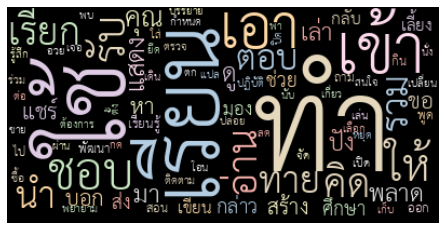

Game Active Verb


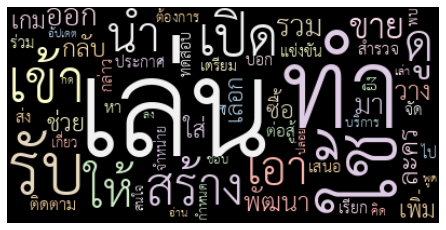

Hitech Active Verb


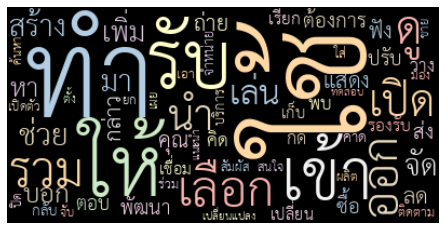

Money Active Verb


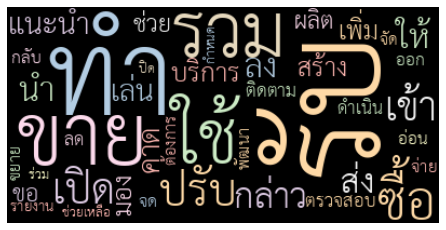

Movie Active Verb


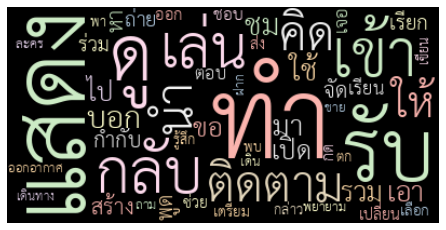

Sport Active Verb


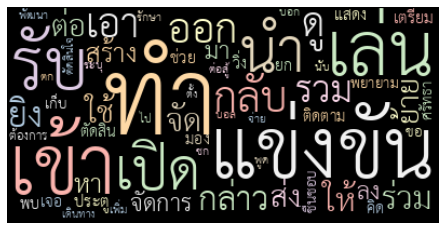

Travel Active Verb


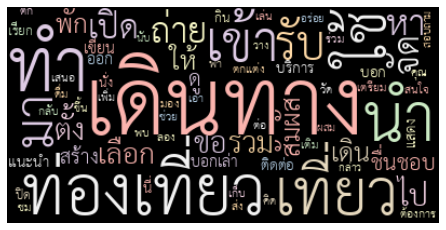

In [29]:
# สร้าง wordcloud ของ Active Verb และ Common Noun ของข่าวแต่ละประเภท
import nltk
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from itertools import chain

#สร้าง list ของประเภทข่าว
sections=['Campus', 'Game', 'Hitech', 'Money', 'Movie', 'Sport', 'Travel']
# path ใข้ save
save_path=r'/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/POS//'

for section in sections:
    print(section,'Active Verb')
    # สร้าง list ของคำที่เป็นคำ Active Verb ของข่าวแต่ละประเภท
    section_list=df_sel[df_sel['new_section']==section]['VACT'].tolist()
    # แปลงจาก 2D list เป็น 1D list ex. [['กิน','อยู่' ,'ไป']]=>['กิน','อยู่' ,'ไป']
    section_ = list(chain.from_iterable(section_list))
    # เลือกเฉพาะคำที่มีจำนวนพยางค์มากกว่า 0
    section_=[w for w in section_ if len(w)>1]
    # หาความถี่ของคำในข่าวแต่ละประเภทโดยใช้คำสั่ง nltk.FreqDist()
    fdist1 = nltk.FreqDist(section_)
    # wordcloud ที่แสดงคำที่มีความถี่สูงสุด
    wordcloud = WordCloud(font_path=r'/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/THSarabunNew001.ttf',
                    background_color ='black', 
                    colormap='Pastel1',
                    min_font_size = 15
                    )
    wordcloud.generate_from_frequencies(fdist1)
    plt.figure(figsize = (6, 8), facecolor = None) 
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()
    wordcloud.to_file(save_path+"snook_VACT_"+section+".png") 
    plt.close()


**Summary :**   

1.   กิจกรรมหรือการกระทำในเนื้อข่าวของแต่ประเภท
  
  จากtag VACT ของ POS หรือ Active Verb จะเห็นได้ว่ากิจกรรมที่ทำนั้นสอดคล้องกับประเภทของข่าว  
  *   ข่าวเกี่ยวกับการศึกษา( Campus) 
  กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการเรียน การอ่าน การคิด การบรรยาย
  *   ข่าวเกี่ยวกับเกมส์(Game)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการเล่น สร้าง พัฒนา
  *   ข่าวเกี่ยวกับเทคโนโลยี(Hitech)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการใช้ การเข้า การเลือก การพัฒนาซึ่งจะมีกิจกรรมที่คล้ายกับเนื้อข่าวในเกมส์
  *   ข่าวเกี่ยวกับเศรษฐกิจ(Money)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการรับ ทำ ขาย ปรับ ซื้อ
  *   ข่าวเกี่ยวกับหนัง(Movie)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการแสดง ดู ติดตาม เล่น 
  *   ข่าวเกี่ยวกับกีฬา(Sport)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการแข่งขัน เข้า รับ เล่น
  *   ข่าวเกี่ยวกับท่องเที่ยว(Travel)กิจกรรมที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับการเดินทาง เที่ยว ท่องเที่ยว

Campus Common Noun


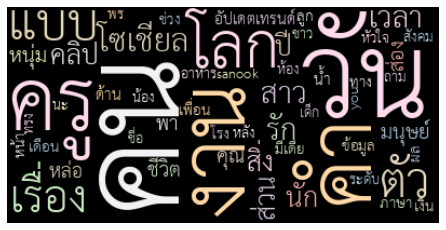

Game Common Noun


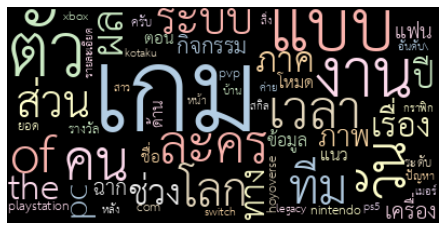

Hitech Common Noun


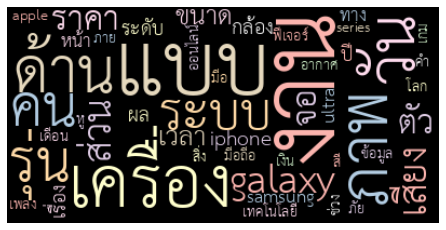

Money Common Noun


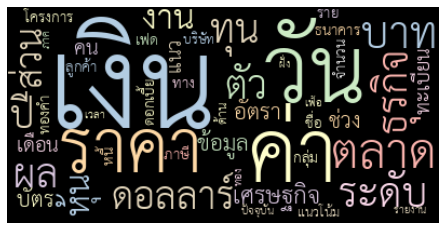

Movie Common Noun


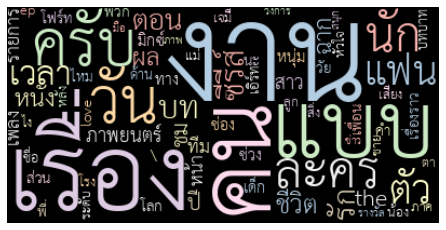

Sport Common Noun


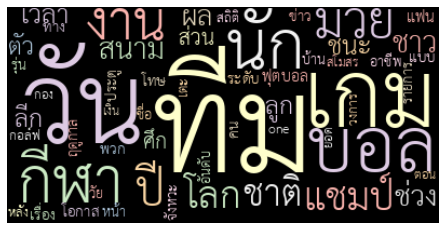

Travel Common Noun


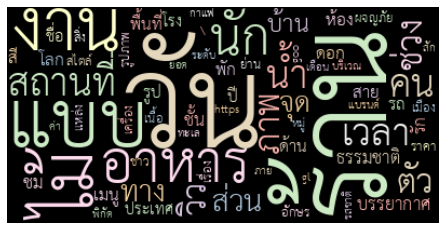

In [30]:
for section in sections:
    print(section,'Common Noun')
    # สร้าง list ของคำที่เป็นคำCommon Noun ของข่าวแต่ละประเภท
    section_list=df_sel[df_sel['new_section']==section]['NCMN'].tolist()
    # แปลงจาก 2D list เป็น 1Dlist ex. [['กิน','อยู่' ,'ไป']]=>['กิน','อยู่' ,'ไป']
    section_ = list(chain.from_iterable(section_list))
    # เลือกเฉพาะคำที่มีจำนวนพยางค์มากกว่า 0
    section_=[w for w in section_ if len(w)>1]
    # หาความถี่ของคำในข่าวแต่ละประเภทโดยใช้คำสั่ง nltk.FreqDist()
    fdist1 = nltk.FreqDist(section_)
    # wordcolud ที่แสดงคำที่มีความถี่สูงสุด
    wordcloud = WordCloud(font_path=r'/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/THSarabunNew001.ttf',
                    background_color ='black', 
                    colormap='Pastel1',
                    min_font_size = 15
                    )
    wordcloud.generate_from_frequencies(fdist1)
    plt.figure(figsize = (6, 8), facecolor = None) 
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()
    wordcloud.to_file(save_path+"snook_NCMN_"+section+".png") 
    plt.close()


2.  สิ่งที่เกี่ยวข้องกับข่าวแต่ละประเภท

    จากtag NCMN ของ POS หรือ Common noun จะเห็นได้ว่าคน สิ่งของซึ่งเป็นคำนามนั้นสอดคล้องกับประเภทของข่าว  
  *   ข่าวเกี่ยวกับการศึกษา( Campus) 
  คำที่พบได้เยอะในเนื้อข่าวสามารถบ่งบอกถึงการศึกษาอย่างชัดเจนได้แค่คำว่าครูู
  *   ข่าวเกี่ยวกับเกมส์(Game)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับเกม คน ตัว งาน ทีม ระบบ ซึ่งสอดคล้องกับประเภทของข่าว
  *   ข่าวเกี่ยวกับเทคโนโลยี(Hitech)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับงาน ระบบ เครื่อง ภาพ รวมทั้ง galaxy iphone samsung ซึ่งสอดคล้องกับประเภทของข่าว
  *   ข่าวเกี่ยวกับเศรษฐกิจ(Money)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับเงิน ราคา ค่า ตลาด ดอลลาร์ ซึ่งสอดคล้องกับประเภทของข่าว
  *   ข่าวเกี่ยวกับหนัง(Movie)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับงาน เรื่อง คน ซีรีส์ ละคร ซึ่งสอดคล้องกับประเภทของข่าว
  *   ข่าวเกี่ยวกับกีฬา(Sport)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับบอล ทีม วัน เกม กีฬา ซึ่งสอดคล้องกับประเภทของข่าว
  *   ข่าวเกี่ยวกับท่องเที่ยว(Travel)คำที่พบได้เยอะในเนื้อข่าวนั้นเกี่ยวกับร้าน วัน ไม้ อาหาร วิวซึ่งสอดคล้องกับประเภทของข่าว



# Named Entity Recognition(NER)

In [31]:
from pythainlp.wangchanberta import ThaiNameTagger

/usr/local/lib/python3.9/dist-packages/pythainlp/wangchanberta/postag.py:26: UserWarning: 
            LST20 corpus are free for research and open source only.

            If you want to use in Commercial use, please contract NECTEC.

            https://www.facebook.com/dancearmy/posts/10157641945708284
            
  warnings.warn("""


/usr/local/lib/python3.9/dist-packages/transformers/pipelines/token_classification.py:159: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  warnings.warn(


In [32]:
# ใช้คำสั่ง ThaiNameTagger() โดยใช้ datasetของ lst20 
NER_model = ThaiNameTagger(dataset_name="lst20")

<ipython-input-32-f576d972377f>:2: DeprecationWarning: dataset_name='lst20' of class `ThaiNameTagger` will be deprecated in version 4.0.0.
  NER_model = ThaiNameTagger(dataset_name="lst20")


/usr/local/lib/python3.9/dist-packages/transformers/pipelines/token_classification.py:159: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [33]:
df_sel=df_sel[df_sel['new_section']=='Hitech']

In [34]:
df_sel['Text_real'][899][0]

'หลังจากที่ samsung ได้เริ่มปล่อย galaxy s23 series ให้กับผู้ใช้งานบางกลุ่มในล็อตแรกกันไปแล้วตอนนี้ล่าสุด 3 รุ่นก็มีการปล่อยอัปเดตครั้งแรกและไม่ได้มีขนาดใหญ่เน้นเรื่องความปลอดภัยมากกว่า'

In [35]:
# แสดงตำแหน่งของ NER ในเอกสารโดยมี tag ครอบคำนั้น
text=NER_model.get_ner(df_sel['Text_real'][899][0],tag=True)
text

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


'หลังจากที่ <ORG>samsung</ORG>  ได้เริ่มปล่อย galaxy<BRN> s23 series</BRN>  ให้กับผู้ใช้งานบางกลุ่มในล็อตแรกกันไปแล้วตอนนี้ล่าสุด <MEA>3</MEA> รุ่นก็มีการปล่อยอัปเดตครั้งแรกและไม่ได้มีขนาดใหญ่เน้นเรื่องความปลอดภัยมากกว่า'

In [36]:
def NER_in_text(list_of_text):
    ''' Specify NER in text'''
    ner_tag=[]
    for text in list_of_text:
        try:
            # แสดงตำแหน่งของ NER ในเอกสารโดยมี tag ครอบคำนั้น
            tag_text=NER_model.get_ner(text,tag=True)
        except:
            tag_text='none'
        ner_tag.append(tag_text)
    return ner_tag

In [37]:
# หา NER ในแต่ละข่าว
df_sel['NER_all']=df_sel['Text_real'].apply(lambda x: NER_in_text(x))

In [38]:
NER_in_text(df_sel['Text_real'][899])

['หลังจากที่ <ORG>samsung</ORG>  ได้เริ่มปล่อย galaxy<BRN> s23 series</BRN>  ให้กับผู้ใช้งานบางกลุ่มในล็อตแรกกันไปแล้วตอนนี้ล่าสุด <MEA>3</MEA> รุ่นก็มีการปล่อยอัปเดตครั้งแรกและไม่ได้มีขนาดใหญ่เน้นเรื่องความปลอดภัยมากกว่า',
 '\\ ',
 'โดยการอัปเดตครั้งนี้จะเป็นการเปลี่ยน  patch  ความปลอดภัยหรือ  security  patch  เป็น <DTM>1 กุมภาพันธ์</DTM>  โดยมีการเปลี่ยน <MEA>48</MEA>  ความปลอดภัยที่เน้นว่าต้องเป็นคีย์หลักของ  android <NUM>13</NUM>  และ <NUM>7</NUM>  อันหลักสําหรับ <BRN>samsung</BRN> one  ui  ซึ่งขนาดของ  files  ไม่เท่ากัน  โดย <BRN>s23</BRN>  และ <BRN></BRN>s<BRN>23</BRN>   จะมีขนาด <MEA>500</MEA>mb  ส่วน <BRN>s23</BRN>  ultra  มีขนาด <MEA>600</MEA>mb นั่นเอง',
 'อย่างไรก็ตามมือถือเรือธงรุ่นนี้ยังได้อัปเกรดระบบปฏิบัติการ <MEA>4</MEA>  รุ่น  พร้อมกับ  security  patch <MEA>5</MEA> ปี  เท่ากับจะไปต่อได้ทั้ง  android <NUM>14</NUM>  <NUM>15</NUM>  <NUM>16</NUM>  และ <NUM>17</NUM>  และสิ้นสุดการ  support  ความปลอดภัย <DTM>ในปี 2028 </DTM>ที่จะถึงนี้']

In [40]:
from nltk.tokenize import RegexpTokenizer
# ใช้ nltk.tokenize.RegexpTokenizer เพื่อหา NER ในแต่ละ entity
# <PER>ป้าจันทร์</PER> ให้เป็น ('PER','ป้าจันทร์','PER')
pattern = r'\<(.*?)\>(.*?)\<\/(.*?)\>'
tokenizer = RegexpTokenizer(pattern) 

In [39]:
# เนื่องจาก model แสดงค่า <unk> เมื่อไม่สามารถที่จะบ่งบอกชนิดของคำได้
# และมี < > ซึ่งเป็นอุปสรรคในการค้นหา NER ดังนั้นจึงลบออกจากข้อความ
df_sel['NER_all']=df_sel['NER_all'].apply( lambda x :[re.sub('\<unk\>'," ",w) for w in x] )

In [41]:
def ner_extract_tag(ner_tag_list):
    ''' Extract word and entity from pattern'''
    result=[]
    for ner_tag in ner_tag_list:
        entity_list=tokenizer.tokenize(ner_tag)
        result.append(entity_list)
    return result

In [42]:
# สกัดคำที่มี entity ออกมาจากข้อความของข่าว
df_sel['NER_extract']=df_sel['NER_all'].apply(lambda x:ner_extract_tag(x) )

In [43]:
df_sel['NER_extract'][899]

[[('ORG', 'samsung', 'ORG'),
  ('BRN', ' s23 series', 'BRN'),
  ('MEA', '3', 'MEA')],
 [],
 [('DTM', '1 กุมภาพันธ์', 'DTM'),
  ('MEA', '48', 'MEA'),
  ('NUM', '13', 'NUM'),
  ('NUM', '7', 'NUM'),
  ('BRN', 'samsung', 'BRN'),
  ('BRN', 's23', 'BRN'),
  ('BRN', '', 'BRN'),
  ('BRN', '23', 'BRN'),
  ('MEA', '500', 'MEA'),
  ('BRN', 's23', 'BRN'),
  ('MEA', '600', 'MEA')],
 [('MEA', '4', 'MEA'),
  ('MEA', '5', 'MEA'),
  ('NUM', '14', 'NUM'),
  ('NUM', '15', 'NUM'),
  ('NUM', '16', 'NUM'),
  ('NUM', '17', 'NUM'),
  ('DTM', 'ในปี 2028 ', 'DTM')]]

In [44]:
def Select_entity(ner_extract_list,entity):
    ''' Select words from the choosing entity from extracted NER'''
    words_list=[]
    # ner_extract ในแต่ละย่อหน้า
    for ner_extract in ner_extract_list:
        if len(ner_extract)>0:
            # เลือกคำที่ตรงกับ entity ที่ต้องการ
            for opentag,word,closetag in ner_extract:
                if opentag==entity:
                        words_list.append(word)
    return words_list

In [45]:
# เลือกคำที่เป็น ORG:Organization  
df_sel['ORG'] =df_sel['NER_extract'].apply(lambda x:Select_entity(x,'ORG') )

In [48]:
# df_sel[:5]

In [50]:
df_sel['Text_real'][10]

['กรณีของฟีเจอร์ game optimizing service  gos  ถือว่าเป็นอีกฟีเจอร์หนึ่งที่ทำให้ประสิทธิภาพในการเล่นเกมลดลง โดยมีการค้นพบใน galaxy s22 series ฟีเจอร์นี้มีหน้าที่ควบคุม cpu และ gpu ให้เหมาะสมเวลาเล่นเกมนานๆ ไม่ให้เครื่องรอ้นนเกินไป แต่อาจจะไม่ทำให้หลายคนมีความสุขเวลาเล่นเกมเพราะจะทำให้เครื่องช้า',
 '\\ ',
 'ล่าสุด android authority ได้รายงานว่า galaxy s23 ได้มีการปรับเรื่อง cpu และ gpu ใน galaxy s23 series ให้คุณสามารถเปิดปิดฟีเจอร์นี้ด้วยตัวเอง โดยขึ้นอยู่กับความคิดวิเคราะห์ของแต่ละคนในการเล่นเกม ว่าต้องการเพียงพอแค่ไหน',
 'แต่อย่างไรก็ตาม samsung galaxy s23 ultra ได้รับการปรับปรุงระบบระบายความร้อนใหม่ให้ดีขึ้นกว่ารุ่นเดิม ตั้งแต่ระยะ 1 6 – 2 8 เท่าแล้วแต่รุ่น ก็คงจะต้องลองดูว่าการปิดฟีเจอร์ควบคุมพลังของคุณนั้นจะทำให้ประสิทธิภาพทำได้ดีแค่ไหน',
 'ทั้งนี้ samsung galaxy s23 series พร้อมวางจำหน่าย 17 กุมภาพันธ์ นี้']

In [49]:
df_sel['ORG'][10]

['samsung', 'samsung']

Hitech Organization


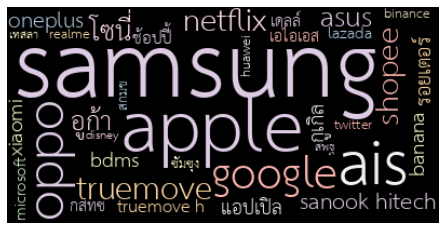

In [51]:
save_path=r'/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/NER//'
sections=['Hitech']
for section in sections:
    print(section,'Organization')
    # สร้าง list ของคำที่เป็นชื่อหน่วยงาน
    section_list=df_sel[df_sel['new_section']==section]['ORG'].tolist()
    # แปลงจาก 2D list เป็น 1Dlist ex. [['กิน','อยู่' ,'ไป']]=>['กิน','อยู่' ,'ไป']
    section_ = list(chain.from_iterable(section_list))
    section_=[w for w in section_ if len(w)>1]
    # หาความถี่ของคำในข่าวแต่ละประเภทโดยใช้คำสั่ง nltk.FreqDist()
    fdist1 = nltk.FreqDist(section_)
    #  wordcolud ที่แสดงคำที่มีความถี่สูงสุด
    wordcloud = WordCloud(font_path=r'/content/drive/MyDrive/NLP/Day2/POS_NER_analysis/THSarabunNew001.ttf',
                    background_color ='black', 
                    colormap='Pastel1',
                    min_font_size = 15
                    )
    wordcloud.generate_from_frequencies(fdist1)
    plt.figure(figsize = (6, 8), facecolor = None) 
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()
    wordcloud.to_file(save_path+"snook_ORG__inclass"+section+".png") 
    plt.close()

Summary :   

1.   องค์กรหรือหน่วยงานที่เกี่ยวข้องกับเนื้อข่าวของแต่ประเภท
  
  จากtag ORG ของ NER หรือ Organization จะเห็นได้ว่าองค์กรหรือหน่วยงานนั้นมีความสอดคล้องกับประเภทของข่าว  
  *   ข่าวเกี่ยวกับการศึกษา( Campus) 
  องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับมหาวิทยาลัยมหิดล มธ คณะวิทยาการเรียนรู้และศึกษาศาสตร์
  *   ข่าวเกี่ยวกับเกมส์(Game)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับsony huawei microsoft ea
  *   ข่าวเกี่ยวกับเทคโนโลยี(Hitech)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับsamsung oppa google apple netflix
  *   ข่าวเกี่ยวกับเศรษฐกิจ(Money)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับสหรัฐฯ ธกส กระทรวงการลัง เฟด
  *   ข่าวเกี่ยวกับหนัง(Movie)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับgmmtv netflix wetv ช่อง 3
  *   ข่าวเกี่ยวกับกีฬา(Sport)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะเกี่ยวกับลิเวอร์พูล เชลซี เรอัล มาดริด
  *   ข่าวเกี่ยวกับท่องเที่ยว(Travel)องค์กรหรือหน่วยงานที่พบได้เยอะในเนื้อข่าวจะสอดคล้องเกี่ยวกับข่าวการศึกษาซึ่งมีเนื้อหาข่าวเกี่ยวกับคณะสถาปัตยกรรมศาสตร์ มหาวิทยาลัยศิลปากร ญี่ปุ่น

In [ ]:
# df_sel.to_pickle('/content/drive/MyDrive/NLP_tutorial/POS_NER/Snook_ner.pkl')

Reference


*   https://colab.research.google.com/drive/1XV2aR_KYrO16iKHKtO0MtufWOFeiFKsc?usp=drive_open


